Research Question:
1.	What are the trends in the stock price of JNUG over the past year?
2.	How does JNUG's volatility compare to the broader market (S&P 500) and Gold (GLD)?
3.	Is there a significant difference in volatility between JNUG and SPY?
4.	Is there a correlation between the volatility of JNUG and SPY or GLD?


In [1]:
#If stock info is not loading, enter <pip install --upgrade yfinance> into your terminal and restart the notebook

#Import My Dependenices
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
from scipy import stats


In [2]:
#Print last years stock chart for the stock
mystock = 'JNUG'
data2 = yf.download(mystock, period = '1y', interval ='1d')

#Create DataFrame with info
data2_df = pd.DataFrame(data2)

#Display first 5 rows
data2_df.describe()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,JNUG,JNUG,JNUG,JNUG,JNUG
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,43.859001,44.970330,42.763526,43.905608,1.008069e+06
std,6.311383,6.455427,6.183291,6.334716,4.509170e+05
min,29.445801,30.496023,29.029676,29.326909,2.946000e+05
25%,38.734861,39.804344,37.650826,38.988108,7.027000e+05
50%,43.220573,44.070925,42.204554,43.191701,8.671000e+05
75%,47.718849,48.981568,46.493252,47.613352,1.227050e+06
max,60.939999,63.430000,60.500000,62.669998,3.902000e+06


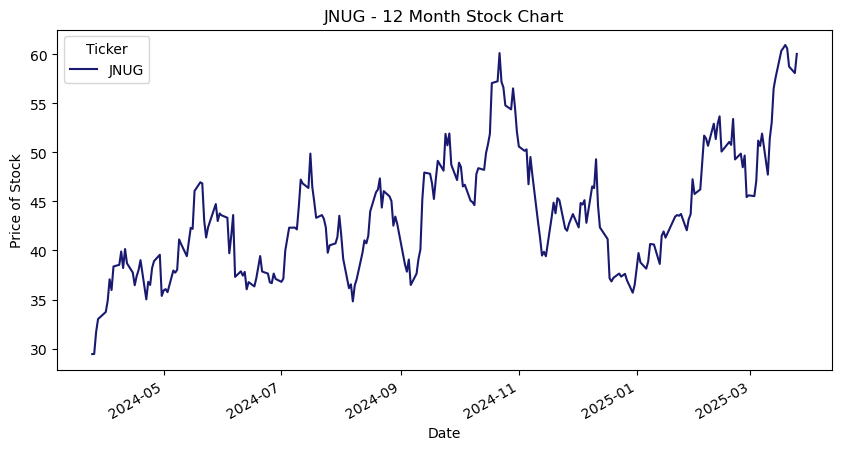

In [3]:
#PLot the daily closing price for the stock from the last year
current_stock = 'JNUG'
y = 'Close'
yr_price_plot = data2_df.plot(y = y, xlabel = 'Date', ylabel = 'Price of Stock', title = f'{current_stock} - 12 Month Stock Chart', 
                             figsize = (10,5), color = 'midnightblue', fontsize = 10);
yr_price_plot;

plt.savefig("JNUG_12m.png", format="png")


In [4]:
#Calculate the 20-Day, 50-Day and 100-Day Moving Averages (MA) for the stock, using the 1 year info.

# Per 'ETF.com' - "Leveraged ETFs decay due to the compounding effect of daily returns, volatility of the market and the cost of leverage.
# The volatility drag of leveraged ETFs means that losses in the ETF can be magnified over time and they are not suitable for long-term investments."
# For this reason, it is best to computer our additional analyses using the previous 1-year info, versus the previous 5-year JNUG stock info.

#Moving Averages (MA)
#20-Day
data2_df['20_MA'] = data2_df['Close'].rolling(window=20).mean()
#50-Day
data2_df['50_MA'] = data2_df['Close'].rolling(window=50).mean()
#100-Day
data2_df['100_MA'] = data2_df['Close'].rolling(window=100).mean()

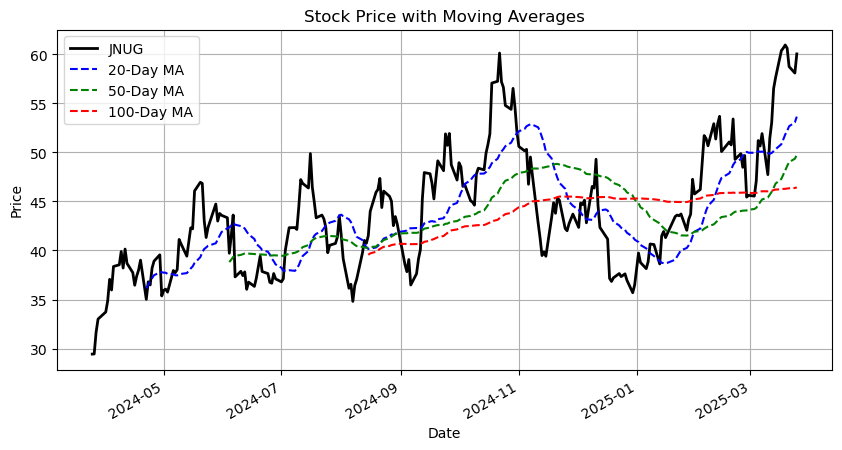

In [5]:
#Plot MA findings

#Stock Closing Price 
ax = data2_df['Close'].plot(color='black', linestyle='-', linewidth=2, label='Close', figsize= [10,5])

#Add MA's to plot
data2_df['20_MA'].plot(ax=ax, color='blue', linestyle='--', linewidth=1.5, label='20-Day MA')
data2_df['50_MA'].plot(ax=ax, color='green', linestyle='--', linewidth=1.5, label='50-Day MA')
data2_df['100_MA'].plot(ax=ax, color='red', linestyle='--', linewidth=1.5, label='100-Day MA')

#Set title, lables and legend
ax.set_title("Stock Price with Moving Averages")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend()
ax.grid(True)

plt.savefig("JNUG_MA_Chart.png", format="png")


In [6]:
# Ensure OHLCV columns exist
# candle_data = data2_df[['Open', 'High', 'Low', 'Close', 'Volume']]
# mpf.plot(candle_data,type='candle',mav=(3,6,9))

data3 = yf.download(mystock, period = '30d', interval ='1h')
data3_df = pd.DataFrame(data3)

[*********************100%***********************]  1 of 1 completed


In [7]:
# Drop the 'Ticker' level from the column index
data3_df.columns = data3_df.columns.droplevel(1)  # Remove 'JNUG'

# Now try plotting again
mpf.plot(data3_df, type='candle', mav=(3,6,9), title = 'JNUG 30 Day Candle Chart', figsize = (14,6), savefig='JNUG_Candle_Chart.png')

In [8]:
#Volatility Analysis: Calculate and visualize historical volatility for JNUG and SPY.
tickers = ['JNUG', 'SPY', 'GLD']
data_4 = yf.download(tickers, period="2y", interval="1d")
closing_prices = data_4['Close']
closing_prices.head()

[*********************100%***********************]  3 of 3 completed


Ticker,GLD,JNUG,SPY
Date,,,
2023-03-27,181.949997,37.631931,385.918549
2023-03-28,183.440002,39.964569,385.052246
2023-03-29,182.529999,39.480621,390.648987
2023-03-30,184.179993,41.145409,392.936340
2023-03-31,183.220001,40.826000,398.474609


In [9]:
#Calculate daily percent changes for the stock and the S&P 500
def rolling_deviation(closing_prices, stock_column, window=20):
    
    data_copy = closing_prices.copy()
    #first calculate pct change for each row
    pct_change = data_copy[stock_column].pct_change()
    #calulcate rolling deviation
    rolling_dev = pct_change.rolling(window=window).std()
    #create a data frame with the output
    comparison_df = pd.DataFrame({
                                  f'{stock_column} Rolling Dev':rolling_dev})
    comparison_df.dropna(inplace = True)
    #Display the Rolling Deviation rows as decimals
    pd.options.display.float_format = '{:,.4f}'.format 

    return comparison_df

In [10]:
#Run the created function on the stocks you would like to compare:
jnug_rolling_dev = rolling_deviation(closing_prices, 'JNUG', window=10)
spy_rolling_dev = rolling_deviation(closing_prices, 'SPY', window=10)
spy_rolling_dev.head(3)


,SPY Rolling Dev
Date,
2023-04-11,0.0067
2023-04-12,0.0069
2023-04-13,0.0067


In [11]:
#Merge the data frames so we can then plot them
jnug_vs_spy = pd.DataFrame({'JNUG Rolling Dev': jnug_rolling_dev['JNUG Rolling Dev'],
                            'SPY Rolling Dev': spy_rolling_dev['SPY Rolling Dev']})
jnug_vs_spy.head()

,JNUG Rolling Dev,SPY Rolling Dev
Date,,
2023-04-11,0.0311,0.0067
2023-04-12,0.0275,0.0069
2023-04-13,0.0281,0.0067
2023-04-14,0.0349,0.0068
2023-04-17,0.0410,0.0055


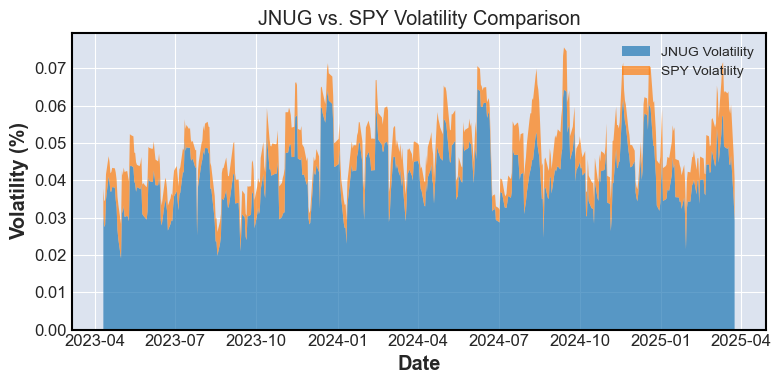

In [12]:
#plot the dataframe:
plt.figure(figsize=(8,4))
plt.stackplot(jnug_vs_spy.index, jnug_vs_spy['JNUG Rolling Dev'], jnug_vs_spy['SPY Rolling Dev'],
              labels=["JNUG Volatility", "SPY Volatility"], alpha = 0.7)
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.title('JNUG vs. SPY Volatility Comparison')
plt.legend(fontsize = 10, loc='upper right')
plt.tight_layout()
plt.savefig("JNUG_vs_SPY.png", format="png")
plt.show()

In [13]:
#Calculate the following statistical analyses:
jnug_vol = jnug_vs_spy['JNUG Rolling Dev']
spy_vol = jnug_vs_spy['SPY Rolling Dev']

#T=Test and P-Value Function
t_stat, p_value = stats.ttest_ind(jnug_vol, spy_vol, equal_var=False)
#Correlation Coefficient and P-Value
corr_coef, p_value_corr = stats.pearsonr(jnug_vol, spy_vol)

#Print Results
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value for T-statistic: {p_value:.4f}')
print(f'Correlation Coefficient: {corr_coef:.4f}')
print(f'P-value for Correlation: {p_value_corr:.4f}')

T-statistic: 80.5793
P-value for T-statistic: 0.0000
Correlation Coefficient: 0.1301
P-value for Correlation: 0.0039


In [14]:
#Now compare the stock to GLD, which is an ETF that tracks gold prices.
jnug_rolling_dev = rolling_deviation(closing_prices, 'JNUG', window=10)
gld_rolling_dev = rolling_deviation(closing_prices, 'GLD', window=10)
gld_rolling_dev.head(3)

,GLD Rolling Dev
Date,
2023-04-11,0.0088
2023-04-12,0.0086
2023-04-13,0.0089


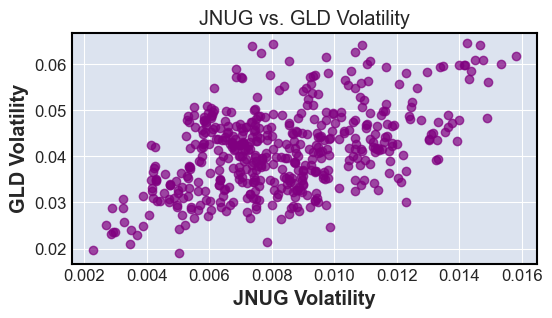

In [15]:
plt.figure(figsize=(6, 3))
plt.scatter(gld_rolling_dev['GLD Rolling Dev'], jnug_rolling_dev['JNUG Rolling Dev'], alpha=0.7, color = 'purple')
plt.xlabel("JNUG Volatility")
plt.ylabel("GLD Volatility")
plt.title("JNUG vs. GLD Volatility")
plt.savefig("JNUG_vs_GLD_Scatter.png", format="png")
plt.show()

T-statistic: 78.6894
P-value for T-statistic: 0.0000
Correlation Coefficient: 0.4826
P-value for Correlation: 0.0000


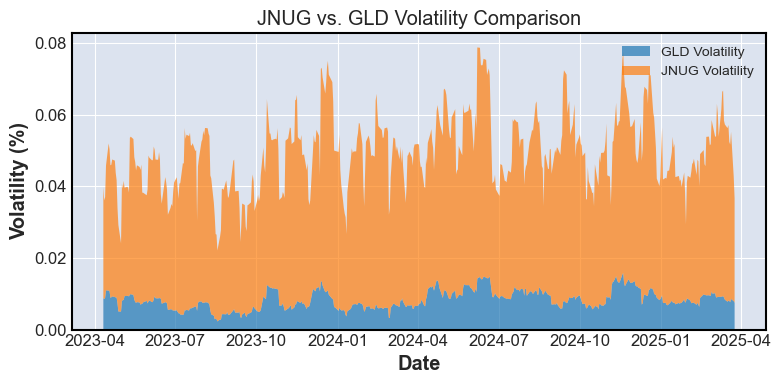

In [17]:
#Calculate the following statistical analyses:
jnug_vol = jnug_vs_spy['JNUG Rolling Dev']
gld_vol = gld_rolling_dev['GLD Rolling Dev']

#T=Test and P-Value Function
t_stat, p_value = stats.ttest_ind(jnug_vol, gld_vol, equal_var=False)
#Correlation Coefficient
corr_coef, p_value_corr = stats.pearsonr(jnug_vol, gld_vol)

#Print Results
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value for T-statistic: {p_value:.4f}')
print(f'Correlation Coefficient: {corr_coef:.4f}')
print(f'P-value for Correlation: {p_value_corr:.4f}')

#plot the dataframe:
plt.figure(figsize=(8,4))
plt.stackplot(jnug_vs_spy.index, gld_rolling_dev['GLD Rolling Dev'], jnug_rolling_dev['JNUG Rolling Dev'],
              labels=["GLD Volatility", "JNUG Volatility"], alpha = 0.7)
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.title('JNUG vs. GLD Volatility Comparison')
plt.legend(fontsize = 10, loc='upper right')
plt.tight_layout()
plt.savefig("JNUG_vs_GLD_Volatility.png", format="png")
plt.show()

In [21]:
def interpret_stats(t_stat, p_val, corr, p_corr, label1, label2):
    print('Summary:')
    print(f'T-statistic: {t_stat:.4f}')
    print(f'P-value for T-statistic: {p_val:.4f}')
    print(f'Correlation Coefficient: {corr:.4f}')
    print(f'P-value for Correlation: {p_corr:.4f}')
    
    if p_val < 0.05:
        print(f"There is a statistically significant difference in volatility between {label1} and {label2}.")
        if t_stat > 0:
            print(f"{label1} is significantly more volatile than {label2}.")
        else:
            print(f"{label2} is significantly more volatile than {label1}.")
    else:
        print(f"There is no statistically significant difference in volatility between {label1} and {label2}.")
    
    if abs(corr) < 0.3:
        print(f"The correlation between {label1} and {label2} volatility is weak.")
    elif abs(corr) < 0.7:
        print(f"There is a moderate correlation between {label1} and {label2} volatility.")
    else:
        print(f"There is a strong correlation between {label1} and {label2} volatility.")


In [22]:
interpret_stats(t_stat, p_value, corr_coef, p_value_corr, "JNUG", "SPY")


Summary:
T-statistic: 78.6894
P-value for T-statistic: 0.0000
Correlation Coefficient: 0.4826
P-value for Correlation: 0.0000
There is a statistically significant difference in volatility between JNUG and SPY.
JNUG is significantly more volatile than SPY.
There is a moderate correlation between JNUG and SPY volatility.


In [23]:
interpret_stats(t_stat, p_value, corr_coef, p_value_corr, "JNUG", "GLD")


Summary:
T-statistic: 78.6894
P-value for T-statistic: 0.0000
Correlation Coefficient: 0.4826
P-value for Correlation: 0.0000
There is a statistically significant difference in volatility between JNUG and GLD.
JNUG is significantly more volatile than GLD.
There is a moderate correlation between JNUG and GLD volatility.
